# Introduction

Units should be in grams, cm, and seconds.

In [ ]:
# from google.colab import drive
# drive.mount("/content/gdrive")

To mount drive: IT MUST BE RUN FIRST without running any cells after it

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import pandas as pd

from os import makedirs,path
from errno import EEXIST

from datetime import datetime, timezone, date

In [ ]:
def mkdir_p(mypath):
    # Creates a directory: same as mkdir or fulltime(path)
    try:
        makedirs(mypath)
    except OSError as exc:
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise




# Creating directory for a path

#filename = 'Figures/VariableSweeps/h={h}/Ni={Ni}/N={N}/rhos={rhos}/rhot={rhot}/rhob={rhob}'.format(h=h, Ni=Ni, N=N, rhos=rhos, rhot=rhot, rhob=rhob) #path for fig save

now = datetime.now()


datestring = now.strftime('%Y_%m_%d')
timestring= now.strftime("%H_%M")




fulltime = datetime.today().strftime('%Y-%m/%d/%H_%M')

# fulltime = datetime.today().strftime('%m_%d/%H_%M')


filename = '/content/gdrive/MyDrive/Output/{fulltime}'.format(fulltime=fulltime) #path for fig save

#filename = '/content/gdrive/MyDrive/Output/Rhob_Sweep/{fulltime}'.format(fulltime=fulltime) #path for fig save


# filename = '/content/gdrive/MyDrive/Output/dtSweep/{fulltime}'.format(fulltime=fulltime) #path for fig save

mkdir_p(filename)

In [ ]:
fulltime

'2024-07/11/16_37'

#  Variable definitions

In [ ]:

# Defining Numerical Constants

dt= 0.05 #time step
Tmax = 10 #time to run simulation
y_start = -5 # initial flat line y_start cm away from sphere


# Ndt = int(Tmax/dt) #number of time steps

Ndt = 2000

Ni = int(500)   #number of interfacial points close to sphere
Nj = int(Ni/2.0)          # number of interfacial points far from the sphere


# Determining Model



# 3D Integration Constants: h = (xf-xi)/ n

a=b=c=0

nzeta = 30
nrho = 30
ntheta = 50


epsilon = 1e-6 #radius around singularities in w


# # Physical Constants Exp. Data

R0 = 5 #xend value, radius of tank, truncation in x-direction

# A = 0.635 #radius of sphere (cm)

g = 981.0 #gravitational acceleration const in cm/s^2


A = 0.641


rhos = 1.35

rhob = 1.32
rhot = 1.3195



mu = 4.773326883







# Microplastics


# A = 0.641
# rhos = 1.36712

# rhot = 0.997
# rhob = 1.3463

# mu_top = 0.09107
# mu_bottom = 0.15673

# #mu = 0.5*(mu_top+mu_bottom)

# mu= 5.03263372




# ##### Stokes Regime Experiment #####
# rhos = 1.3671 #density of sphere g/cc

# rhot = 1.34812   #top fluid density g/cc

# rhob = 1.356 #1.354 #bottom fluid density g/cc

# mu = 6.55 # fluid viscosity Poise - millipascal second


##### Entrainment Regime Experiment #####

# rhos = 1.36712 #density of sphere g/cc
# rhot = 1.34695  #top fluid density g/cc
# rhob= 1.36178 #bottom fluid density g/cc
# mu= 4 # fluid viscosity Poise - millipascal second

#########################


# =============================================================================
#
# ######################### Stokes Regimes #########################
#
# =============================================================================



# =============================================================================
# Exp 4: 05-20-2016
# Sphere name: 8 --- Salt = NaCL
# Sphere recovers, use a really small dt
# =============================================================================


# A = 0.641
# rhos = 1.368

# rhob = 1.35

# mutop = 5.03263372
# mubottom = 5.276099152



# mutop = 4.773326883
# mubottom = 5.000284943


# # mu = (mutop+mubottom)/2.0

# mu = mutop
# # expno = 1




# =============================================================================
# Exp 8: 05-20-2016
# Sphere name: 8 --- Salt = NaCL
# Sphere recovers, rhoregion = 0.21252153934520693
# =============================================================================


# A = 0.641*0.1
# rhos = 1.36712

# # rhos = 1.1



# rhot = 1.34629
# rhob=1.3463

# mutop = 5.03263372
# mubottom =5.276099152

# #mu = (mutop+mubottom)*0.5149

# mu = mutop


# =============================================================================
#
# ######################### Entrainment Regimes #########################
#
# =============================================================================


# =============================================================================
# Exp 1: 02-07-2013
# Sphere name: 8 --- Salt = NaCL
#
# =============================================================================


# A = 0.641
# rhos = 1.36712

# rhot = 1.34077
# rhob= 1.36245712

# mutop = 6.944015664
# mubottom =7.990688183

# mu = (mutop+mubottom)*0.5

# mu = mutop


# =============================================================================
# Exp 1: 04-09-2013
# Sphere name: 8 --- Salt = NaCL
#
# =============================================================================


# A = 0.641
# rhos = 1.36712

# rhot =1.34695
# rhob= 1.36178

# mutop = 3.611845768
# mubottom =3.406853812

# mu = (mutop+mubottom)*0.5

# mu = mutop


# Numbers

frtd = 4.0/3.0
hf = 0.5
thd = 1/3.0
sxth = 1/6.0
twonths = 2.0/9.0
svnhf = 7.0/ 2.0

oneoversixmuA = 1.0/ (6.0*np.pi*mu*A)
govereightpimu = g / (8.0*np.pi*mu)
rhoregion = (rhob-rhot)/(rhos-rhob)



K = (1-2.10444*(A / R0)+2.08877*(A/R0)**3)

# plotting parameters

Runtime = 0
lineweight = 0.85


V_TermTop =  (2*A**2 *g)/(9*mu)*(rhot-rhos)
V_TermBttm = (2*A**2 *g)/(9*mu)*(rhob-rhos)



In [ ]:
drhob = rhob - rhot

drhob

0.000500000000000167

In [ ]:
drhos = rhos-rhob

drhos

0.030000000000000027

In [ ]:
U = -V_TermTop

Re = (rhos*U*A)/(mu)

print('Re=', Re)


Re= 0.10375805862569747


In [ ]:
V_TermTop

-0.5723361998797385

In [ ]:
a = 0.01



1.0/ (6.0*np.pi*mu*a)

1.1114187022522934

# Sphere Velocity and Forces

In [ ]:
def sphere_velocities(yend, Astar, y0):




#Volumes of sphere by region

  def Vol_s(A): #volume of a sphere of radius A
      return frtd*np.pi*A**3 # Absolute sphere volume

  def Vol_s_top_ent(A): #portion of the sphere in the top layer
      return 2*np.pi*(thd*A**3 - hf*(A**2)*yend+sxth*(yend**3)) #volume of sphere in top in entrainment

  def Vol_s_bttm_ent(A): #portion of sphere in bottom layer
      return 2*np.pi*(hf*(A**2)*yend-sxth*(yend**3)+thd*(A**3)) #volume of sphere in bottom in entrainment

  # Gravity Force

  def GravityForce(yend, A):
      return rhos*Vol_s(A)*g


  # Buoyancy Force from top and bottom portions of sphere

  def B_top_ent(A):
      return g*rhot*Vol_s_top_ent(A) # buoyant force from top layer displacement
  def B_bttm_ent(A):
      return g*rhob*Vol_s_bttm_ent(A) #buoyant force from bottom layer displacement


  def B_int(A):
      return float(B_top_ent(A)+B_bttm_ent(A)) #when -A < yend < A

  # Defining Buoancy Function

  def Buoyancy(yend, A):

      if -A <= yend <= A:
          return B_int(A)
      if yend < -A:
          return g*rhot*Vol_s(A)
      else:
          return g*rhob*Vol_s(A)





  def S_int(yend, Astar):

      if yend < -A:
          #print('A*=', Astar)

          S1= g* (rhot-rhob)*(-1.0/(6.0*Astar**3))*( A*(A**2-3*Astar**2)*np.pi*(-y0**3+3*Astar**2*(y0-yend)+yend**3))

          #print('S1=', S1)
          return S1

      elif -A <= yend <= A:

          S2= g*(rhot-rhob)*(np.pi*(9*A*Astar**4*y0-3*A*Astar**2*y0**3+A**3*(4*Astar**3-3*Astar**2*y0+y0**3)+3*A*(A-Astar)*Astar**2*(A+3*Astar)*yend-(A-Astar)**2 *(A+2*Astar)*yend**3))/ (6.0*Astar**3)

          #print('S2=', S2)

          return S2

      elif A < yend <= Astar:


          S3= g*(rhot-rhob)*(A *np.pi *(3.0*Astar**2 *(-y0**3 + 3.0 *Astar**2 *(y0 - yend) + yend**3) + A**2 *(8.0 *Astar**3 + y0**3 - yend**3 + 3.0 *Astar**2 *(-y0 + yend))))/(6.0* Astar**3)

          #print('S3=', S3)

          return S3

      elif yend >= Astar:


          S4= g*(rhot-rhob)*((A*np.pi/6.0)*(

          -(3.0*(Astar-y0)**2 *(2*Astar+y0))/(Astar) + A**2 *(   10 - (3.0*Astar)/ (np.sqrt(A**2-2*A*Astar+2*Astar**2)) -(3.0*y0)/Astar  + (y0**3 / Astar**3) + (3.0*yend)/(np.sqrt( (A-Astar)**2 + yend**2)))

              + 9*(A-Astar)**2 *(np.arcsinh(Astar / abs(A-Astar)) - np.arcsinh(yend/ abs(A-Astar)))))

          #print('S4=', S4)

          return S4

  def Velocity(yend, Astar):

    if yend < -A:
        #print('V Term Top')

        return V_TermTop +oneoversixmuA * S_int(yend, Astar) #terminal velocity of sphere in top

    elif -A <= yend  <= A:

        V2 =  oneoversixmuA*(S_int(yend, Astar) + Buoyancy(yend,A)-GravityForce(yend,A)) #velocity in entrainment layer

        #print(V2)

        return V2

    elif yend > A:

        return V_TermBttm  +oneoversixmuA*S_int(yend, Astar)  #terminal velocity of sphere in bottom






  return V_TermTop, V_TermBttm, Velocity(yend, Astar), S_int(yend, Astar)

# Stokes Flow

In [ ]:
def stokesflow(yend, Astar, y0, r, X, Y):

  #r = np.zeros( (Ndt, Ni+Nj))
  # Stokes flow
  #r[i, :] = np.sqrt(X[i, :]**2 + Y[i, :]**2)
  V_TermTop, V_TermBttm, sphvel, S_int_array = sphere_velocities(yend, Astar, y0)


  def ux(yend):#ur
      V_TermTop, V_TermBttm, sphvel, S_int_array = sphere_velocities(yend, Astar, y0)
      #r[i, :] = np.sqrt(X[i, :]**2 + Y[i, :]**2)

      V = -sphvel
      #V=1
      # if r==0:
      #   return 0

      return V*(((-3*A*X*Y)/(4*r**3))+ ((3*(A**3)*X*Y)/(4*r**5)))   #R or x-comp of stokes flow


  def uy(yend): #uz

      #r[i, :] = np.sqrt(X[i, :]**2 + Y[i, :]**2)
      V_TermTop, V_TermBttm, sphvel, S_int_array = sphere_velocities(yend, Astar, y0)
      V = -sphvel
      #V=1

      # if r==0:
      #   return 0

      return V*(1-3*A/(4*r)-3*A*Y**2/(4*r**3)-A**3/(4*r**3)+3*Y**2*A**3/(4*r**5))  #Z or y-comp of stokes flow
  #print(ux(yend), uy(yend))
  return ux(yend), uy(yend)

# Full Field

In [ ]:
def Oseen_def(X,Y, rho, zeta, theta):

  #print('X=', X)


  def rr(X, Y, rho, zeta, theta):

      rr = np.sqrt(X**2 + rho**2 - 2*rho*X*np.cos(theta)+(Y-zeta)**2)

      return rr

  def rstar(X, Y, rho, zeta, theta):

      rstar = np.sqrt(sigma(rho,zeta)**2 *(zeta**2+rho**2) + X**2 - 2*sigma(rho,zeta)*(X*rho*np.cos(theta)-Y*zeta) + Y**2)

      return rstar

  def sigma(rho, zeta):

      if rho**2 + zeta**2 <=0:
          sigma = 0
      else:
          sigma =  (A**2 / (rho**2+zeta**2))

      return sigma

  def modx(X, Y):

      modx = np.sqrt(X**2 + Y**2)

      return modx

  def modystar(rho,zeta):

      if rho**2+zeta**2 == 0:

          modystar = 0

      else:

          modystar = A**2 / np.sqrt(rho**2+zeta**2)

      return modystar

  def dPhi3dx1(rho, zeta, theta, X, Y):

    dPhi3dx1 = ((A**2 - X**2 - Y**2)*(-A**2 + zeta**2 + rho**2*np.cos(theta)**2)* ((-3*A*(Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))* (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2)))/((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)**2.5 - (3*zeta*(X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2)))/(A*((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)**1.5) + (2*zeta*((3*A**2*zeta*(Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))* (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2)))/ ((zeta**2 + rho**2*np.cos(theta)**2)* ((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)**2.5) +  (3*A**2*rho*np.cos(theta)*(X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)/ ((zeta**2 + rho**2*np.cos(theta)**2)* ((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)**2.5) - (A**2*rho*np.cos(theta))/  ((zeta**2 + rho**2*np.cos(theta)**2)* ((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)**1.5)))/A+ (3*A*((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt(X**2 + Y**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))* (((np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*(Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))* (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2)))/ ((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)**1.5 + (A**2*zeta*(X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2)))/ ((zeta**2 + rho**2*np.cos(theta)**2)* np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)))/ ((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + np.sqrt(X**2 + Y**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)) - ((Y + (A**2*np.sqrt(X**2 + Y**2)*zeta)/((zeta**2 + rho**2*np.cos(theta)**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)))* ((A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  (np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*(X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2)))/np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)))/ ((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt(X**2 + Y**2)* np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))**2 -  (((A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + (X*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))/np.sqrt(X**2 + Y**2))*(Y - (2*A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) - (np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*(Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2)))/np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2) + (A**2*zeta*np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2))/((zeta**2 + rho**2*np.cos(theta)**2)* np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))))/((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt(X**2 + Y**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))**2 + (2*(Y + (A**2*np.sqrt(X**2 + Y**2)*zeta)/ ((zeta**2 + rho**2*np.cos(theta)**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)))* ((A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + (X*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))/np.sqrt(X**2 + Y**2))*(-((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2) - (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)))/ ((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt(X**2 + Y**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))**3 - (A**2*X*zeta*(-((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2) -  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)))/(np.sqrt(X**2 + Y**2)*(zeta**2 + rho**2*np.cos(theta)**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + np.sqrt(X**2 + Y**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))**2)))/(np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* (-((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2) -  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2))) - (3*A*((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + np.sqrt(X**2 + Y**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))*((A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + (np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*(X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2)))/np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2))* ((Y - (2*A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) - (np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* (Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2)))/ np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2) +  (A**2*zeta*np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2))/ ((zeta**2 + rho**2*np.cos(theta)**2)* np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)))/ ((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt(X**2 + Y**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)) - ((Y + (A**2*np.sqrt(X**2 + Y**2)*zeta)/((zeta**2 + rho**2*np.cos(theta)**2)* np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)))*(-((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2) - (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)))/((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt(X**2 + Y**2)* np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))**2))/(np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*(-((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2) - (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2))**2) + (3*A*((A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + (X*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))/np.sqrt(X**2 + Y**2))*((Y - (2*A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) - (np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*(Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2)))/np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2) + (A**2*zeta*np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2))/((zeta**2 + rho**2*np.cos(theta)**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)))/((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + np.sqrt(X**2 + Y**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)) - ((Y + (A**2*np.sqrt(X**2 + Y**2)*zeta)/((zeta**2 + rho**2*np.cos(theta)**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)))*(-((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2) - (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)))/((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + np.sqrt(X**2 + Y**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))**2))/(np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*(-((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2) - (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)))))/(2.0*(zeta**2 + rho**2*np.cos(theta)**2)**1.5)


    return dPhi3dx1


  # put dphi3dx3 here
  # d phi / d x3

  def dPhi3dx3(rho,zeta, theta, X, Y):

      dPhi3dx3 =  ((A**2 - X**2 - Y**2)*(-A**2 + zeta**2 + rho**2*np.cos(theta)**2)* ((-3*A*(Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2)/ ((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)**2.5 +  A/((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)**1.5 - (3*zeta*(Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2)))/(A*((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)**1.5) + (2*zeta*((3*A**2*zeta*(Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2)/ ((zeta**2 + rho**2*np.cos(theta)**2)* ((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)**2.5) +  (3*A**2*rho*np.cos(theta)*(Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))*(X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2)))/ ((zeta**2 + rho**2*np.cos(theta)**2)* ((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)**2.5) - (A**2*zeta)/((zeta**2 + rho**2*np.cos(theta)**2)* ((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)**1.5)))/A + (3*A*((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt(X**2 + Y**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))* ((1 + (np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*(Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2)/ ((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)**1.5 -  np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)/np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2) + (A**2*zeta*(Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2)))/ ((zeta**2 + rho**2*np.cos(theta)**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)))/ ((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt(X**2 + Y**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)) - ((Y + (A**2*np.sqrt(X**2 + Y**2)*zeta)/ ((zeta**2 + rho**2*np.cos(theta)**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)))* ((A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* (Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2)))/ np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)))/((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt(X**2 + Y**2)* np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))**2 -  (((A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (Y*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))/ np.sqrt(X**2 + Y**2))* (Y - (2*A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) - (np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*(Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2)))/np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2) + (A**2*zeta*np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2))/ ((zeta**2 + rho**2*np.cos(theta)**2)* np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))))/((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt(X**2 + Y**2)* np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))**2 + (2*(Y + (A**2*np.sqrt(X**2 + Y**2)*zeta)/ ((zeta**2 + rho**2*np.cos(theta)**2)* np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)))* ((A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (Y*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))/ np.sqrt(X**2 + Y**2))* (-((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2) -   (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)))/ ((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt(X**2 + Y**2)* np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))**3 -  ((1 + (A**2*Y*zeta)/ (np.sqrt(X**2 + Y**2)*(zeta**2 + rho**2*np.cos(theta)**2)*  np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)))* (-((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2) -  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +   (A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +   (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)))/ ((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt(X**2 + Y**2)* np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))**2))/ (np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* (-((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2) -  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +   (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2))) - (3*A*((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt(X**2 + Y**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))* ((A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* (Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2)))/np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2))* ((Y - (2*A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) -  (np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* (Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2)))/  np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2) +  (A**2*zeta*np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2))/((zeta**2 + rho**2*np.cos(theta)**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)))/((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt(X**2 + Y**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)) -  ((Y + (A**2*np.sqrt(X**2 + Y**2)*zeta)/ ((zeta**2 + rho**2*np.cos(theta)**2)* np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)))* (-((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2) -  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)))/ ((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + np.sqrt(X**2 + Y**2)* np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))**2))/ (np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*  (-((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2) - (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2))**2) +  (3*A*((A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (Y*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))/np.sqrt(X**2 + Y**2))*((Y - (2*A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) -  (np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* (Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2)))/ np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2) +  (A**2*zeta*np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 +  (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2))/ ((zeta**2 + rho**2*np.cos(theta)**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)))/ ((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + np.sqrt(X**2 + Y**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)) - ((Y + (A**2*np.sqrt(X**2 + Y**2)*zeta)/((zeta**2 + rho**2*np.cos(theta)**2)*np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)))*(-((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2) -  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) +  (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)))/ ((A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) +  np.sqrt(X**2 + Y**2)* np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2))**2))/(np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)* (-((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2) - (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 +  (A**2*Y*zeta)/(zeta**2 + rho**2*np.cos(theta)**2) + (A**2*X*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2) + np.sqrt((A**4*zeta**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2 + (A**4*rho**2*np.cos(theta)**2)/(zeta**2 + rho**2*np.cos(theta)**2)**2)*np.sqrt((Y - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)))))/(2.0*(zeta**2 + rho**2*np.cos(theta)**2)**1.5)

      return dPhi3dx3

  def Oseen_x(rho, zeta, theta):

    #singularity_boolean = 1.0*((((X-rho)**2 + (Y-zeta)**2) > epsilon))


    singularity_boolean = 1.0*(((((X-rho)**2 + (Y-zeta)**2) > epsilon**2) ))

    #singularity_boolean = 1.0*(((((X-rho)**2+(Y-zeta)**2)) > epsilon) & (X>epsilon))



    sing_indicies = np.where(singularity_boolean)[0]

    r = np.sqrt(X[sing_indicies]**2 + rho**2 + Y[sing_indicies]**2 - 2*Y[sing_indicies]*zeta + zeta**2 - 2*X[sing_indicies]*rho*np.cos(theta))

    rs = (A**2 / (rho**2+zeta**2))*r

    Full_Wx = np.zeros(len(X))

    Full_Wx[sing_indicies] =  ((Y[sing_indicies] - zeta)*(X[sing_indicies] - rho*np.cos(theta)))/(r**3)
    - (A**3*(A**2*rho*np.cos(theta) - X[sing_indicies]*(zeta**2 + rho**2*np.cos(theta)**2))*(A**2*zeta - Y[sing_indicies]*(zeta**2 + rho**2*np.cos(theta)**2)))/((zeta**2 + rho**2*np.cos(theta)**2)**3.5*((Y[sing_indicies] - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2+ (X[sing_indicies] - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)**1.5) + (A*(A**2 - zeta**2 - rho**2*np.cos(theta)**2)*(-(A**2*X[sing_indicies]*zeta**3) + rho*zeta*(A**4 - A**2*Y[sing_indicies]*zeta + (X[sing_indicies]**2 + Y[sing_indicies]**2)*zeta**2)*np.cos(theta) - A**2*X[sing_indicies]*rho**2*zeta*np.cos(theta)**2 - rho**3*(A**2*Y[sing_indicies] - (X[sing_indicies]**2 + Y[sing_indicies]**2)*zeta)*np.cos(theta)**3))/((zeta**2 + rho**2*np.cos(theta)**2)**2.5*(A**4 - 2*A**2*Y[sing_indicies]*zeta + (X[sing_indicies]**2 + Y[sing_indicies]**2)*zeta**2 - 2*A**2*X[sing_indicies]*rho*np.cos(theta) + rho**2*(X[sing_indicies]**2 + Y[sing_indicies]**2)*np.cos(theta)**2)*np.sqrt((Y[sing_indicies] - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X[sing_indicies] - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)) + dPhi3dx1(X[sing_indicies], Y[sing_indicies], rho, zeta, theta)
    #Full_Wx[sing_indicies] = 0

    #-(mod(X[sing_indicies], Y[sing_indicies])-A**2)*dPhidx1(rho,zeta,theta,X[sing_indicies],Y[sing_indicies])+
    return Full_Wx

  # Full Oseen in Z, y, x3 direction

  def Oseen_y(rho, zeta, theta):

    singularity_boolean = 1.0*(((((X-rho)**2 + (Y-zeta)**2) > epsilon**2) ))



    #singularity_boolean = 1.0*(((((X-rho)**2+(Y-zeta)**2)) > epsilon) & (X>epsilon))

    sing_indicies = np.where(singularity_boolean)[0]

    #print(sing_indicies)

    Full_Wy = np.zeros(len(X))
    rr = np.sqrt(X[sing_indicies]**2 + rho**2 + Y[sing_indicies]**2 - 2*Y[sing_indicies]*zeta + zeta**2 - 2*X[sing_indicies]*rho*np.cos(theta))

    Full_Wy[sing_indicies] =   (Y[sing_indicies] - zeta)**2/(rr**3)
    + 1/rr - (A**3*(Y[sing_indicies] - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2)/((zeta**2 + rho**2*np.cos(theta)**2)**1.5*((Y[sing_indicies] - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X[sing_indicies] - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)**1.5) - A/(np.sqrt(zeta**2 + rho**2*np.cos(theta)**2)*np.sqrt((Y[sing_indicies] - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X[sing_indicies] - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)) + (A*zeta*(A**2 - zeta**2 - rho**2*np.cos(theta)**2)*(zeta*(A**4 - 2*A**2*Y[sing_indicies]*zeta + (X[sing_indicies]**2 + Y[sing_indicies]**2)*zeta**2) - rho**2*(2*A**2*Y[sing_indicies] - (X[sing_indicies]**2 + Y[sing_indicies]**2)*zeta)*np.cos(theta)**2))/((zeta**2 + rho**2*np.cos(theta)**2)**2.5*(A**4 - 2*A**2*Y[sing_indicies]*zeta + (X[sing_indicies]**2 + Y[sing_indicies]**2)*zeta**2 - 2*A**2*X[sing_indicies]*rho*np.cos(theta) + rho**2*(X[sing_indicies]**2 + Y[sing_indicies]**2)*np.cos(theta)**2)*np.sqrt((Y[sing_indicies] - (A**2*zeta)/(zeta**2 + rho**2*np.cos(theta)**2))**2 + (X[sing_indicies] - (A**2*rho*np.cos(theta))/(zeta**2 + rho**2*np.cos(theta)**2))**2)) +dPhi3dx3(X[sing_indicies], Y[sing_indicies], rho, zeta, theta)

    #-(mod(X[sing_indicies], Y[sing_indicies])-A**2)*dPhidx3(rho,zeta,theta,X[sing_indicies],Y[sing_indicies])+
    return Full_Wy


  #print(Oseen_x(rho, zeta, theta))

  #print('Wx=', Oseen_x(rho,zeta,theta))


  return Oseen_x(rho, zeta, theta), Oseen_y(rho, zeta, theta)

# Far Field

In [ ]:
def FarField_defs(rho, zeta, X, Y):

  def lamb(rho, zeta, X, Y):
    #from EulerMethod_n import r, Astar, y0, yend

    #print('lamb numerator:', 4*X*rho)
    #print('lamb denominator:', (X**2 -2*rho*X + Y**2 + zeta**2 + rho**2 - 2*Y*zeta))

    lambd = - (4*X*rho)/ (X**2 -2*rho*X + Y**2 + zeta**2 + rho**2 - 2*Y*zeta)

    #print('lambd:', lambd)
    return lambd

  def K(argument):

    #return 1.0

    return sp.special.ellipk(argument) # complete integral of second kind

  def E(argument):

    #return 1.0

    return sp.special.ellipe(argument) # incomplete integral of second kind

  #print(len(X))
  def W_FFx(rho, zeta, X, Y):

    singularity_boolean = 1.0*(((((X-rho)**2+(Y-zeta)**2)) > epsilon) & (X>0))

    sing_indicies = np.where(singularity_boolean)[0]

    W_FFx = np.zeros(len(X))



    argument = lamb(rho,zeta,X[sing_indicies],Y[sing_indicies])



    #W_FFx[sing_indicies] =0

    #W_FFx[sing_indicies] = (3*A*X[sing_indicies]*Y[sing_indicies]*(2*zeta**2 + rho**2))/(16.0*(X[sing_indicies]**2 + Y[sing_indicies]**2)**1.5*mu*(zeta**2 + rho**2)**1.5) + (3*A**5*X[sing_indicies]*(8*zeta**3*(2*X[sing_indicies]**4 - 2*Y[sing_indicies]**2*(Y[sing_indicies] - 4*zeta)*(2*Y[sing_indicies] - zeta) + X[sing_indicies]**2*(-2*Y[sing_indicies]**2 - 17*Y[sing_indicies]*zeta + 2*zeta**2)) + 8*zeta*(-3*X[sing_indicies]**4 + Y[sing_indicies]**2*(6*Y[sing_indicies]**2 - 33*Y[sing_indicies]*zeta - 4*zeta**2) + X[sing_indicies]**2*(3*Y[sing_indicies]**2 + 37*Y[sing_indicies]*zeta + zeta**2))*rho**2 + (4*Y[sing_indicies]**2*(3*Y[sing_indicies] + 8*zeta) - X[sing_indicies]**2*(23*Y[sing_indicies] + 8*zeta))*rho**4))/(128.0*(X[sing_indicies]**2 + Y[sing_indicies]**2)**3.5*mu*(zeta**2 + rho**2)**3.5) + (A**3*X[sing_indicies]*(X[sing_indicies]**2*(Y[sing_indicies] + 5*zeta)*(2*zeta**2 - rho**2) + Y[sing_indicies]*(Y[sing_indicies]**2*(2*zeta**2 - rho**2) + 10*Y[sing_indicies]*zeta*(-2*zeta**2 + rho**2) + 3*(2*zeta**4 + 3*zeta**2*rho**2 + rho**4))))/(16.0*(X[sing_indicies]**2 + Y[sing_indicies]**2)**2.5*mu*(zeta**2 + rho**2)**2.5) - ((Y[sing_indicies] - zeta)*(2*(X[sing_indicies]**2 - Y[sing_indicies]**2 + 2*Y[sing_indicies]*zeta - zeta**2 - rho**2)*E(argument) + 2*(X[sing_indicies]**2 + Y[sing_indicies]**2 - 2*Y[sing_indicies]*zeta + zeta**2 + 2*X[sing_indicies]*rho + rho**2)*K(argument)))/(X[sing_indicies]*np.sqrt(X[sing_indicies]**2 + Y[sing_indicies]**2 - 2*Y[sing_indicies]*zeta + zeta**2 - 2*X[sing_indicies]*rho + rho**2)*(X[sing_indicies]**2 + Y[sing_indicies]**2 - 2*Y[sing_indicies]*zeta + zeta**2 + 2*X[sing_indicies]*rho + rho**2))

    #W_FFx[sing_indicies] = (2*(E(argument)*(-rho**2 + X[sing_indicies]**2 - (Y[sing_indicies] - zeta)**2) + K(argument)*((rho + X[sing_indicies])**2 + (Y[sing_indicies] - zeta)**2))*(Y[sing_indicies] - zeta))/(np.pi*X[sing_indicies]*np.sqrt((-rho + X[sing_indicies])**2 + (Y[sing_indicies] - zeta)**2)*((rho + X[sing_indicies])**2 + (Y[sing_indicies] - zeta)**2)) - (3*X[sing_indicies]*Y[sing_indicies]*(rho**2 + 2*zeta**2))/(2.0*(X[sing_indicies]**2 + Y[sing_indicies]**2)**1.5*(rho**2 + zeta**2)**1.5) + (X[sing_indicies]*(X[sing_indicies]**2*(Y[sing_indicies] + 5*zeta)*(-rho**2 + 2*zeta**2) + Y[sing_indicies]*(10*Y[sing_indicies]*zeta*(rho**2 - 2*zeta**2) + Y[sing_indicies]**2*(-rho**2 + 2*zeta**2) + 3*(rho**4 + 3*rho**2*zeta**2 + 2*zeta**4))))/(2.0*(X[sing_indicies]**2 + Y[sing_indicies]**2)**2.5*(rho**2 + zeta**2)**2.5) - (3*X[sing_indicies]*(8*X[sing_indicies]**4*(-3*rho**2*zeta + 2*zeta**3) + X[sing_indicies]**2*(-8*Y[sing_indicies]**2*(-3*rho**2*zeta + 2*zeta**3) + Y[sing_indicies]*(-23*rho**4 + 296*rho**2*zeta**2 - 136*zeta**4) + 8*zeta*(-rho**4 + rho**2*zeta**2 + 2*zeta**4)) - 4*Y[sing_indicies]**2*(4*Y[sing_indicies]**2*(-3*rho**2*zeta + 2*zeta**3) + 8*zeta*(-rho**4 + rho**2*zeta**2 + 2*zeta**4) - 3*Y[sing_indicies]*(rho**4 - 22*rho**2*zeta**2 + 12*zeta**4))))/(16.0*(X[sing_indicies]**2 + Y[sing_indicies]**2)**3.5*(rho**2 + zeta**2)**3.5)
    W_FFx[sing_indicies] = (2*(E(argument)*(-rho**2 + X[sing_indicies]**2 - (Y[sing_indicies] - zeta)**2) + K(argument)*((rho + X[sing_indicies])**2 + (Y[sing_indicies] - zeta)**2))*(Y[sing_indicies] - zeta))/(X[sing_indicies]*np.sqrt((-rho + X[sing_indicies])**2 + (Y[sing_indicies] - zeta)**2)*((rho + X[sing_indicies])**2 + (Y[sing_indicies] - zeta)**2)) - (3*X[sing_indicies]*Y[sing_indicies]*(rho**2 + 2*zeta**2))/(2.0*(X[sing_indicies]**2 + Y[sing_indicies]**2)**1.5*(rho**2 + zeta**2)**1.5) + (X[sing_indicies]*(X[sing_indicies]**2*(Y[sing_indicies] + 5*zeta)*(-rho**2 + 2*zeta**2) + Y[sing_indicies]*(10*Y[sing_indicies]*zeta*(rho**2 - 2*zeta**2) + Y[sing_indicies]**2*(-rho**2 + 2*zeta**2) + 3*(rho**4 + 3*rho**2*zeta**2 + 2*zeta**4))))/(2.0*(X[sing_indicies]**2 + Y[sing_indicies]**2)**2.5*(rho**2 + zeta**2)**2.5) - (3*X[sing_indicies]*(8*X[sing_indicies]**4*(-3*rho**2*zeta + 2*zeta**3) + X[sing_indicies]**2*(-8*Y[sing_indicies]**2*(-3*rho**2*zeta + 2*zeta**3) + Y[sing_indicies]*(-23*rho**4 + 296*rho**2*zeta**2 - 136*zeta**4) + 8*zeta*(-rho**4 + rho**2*zeta**2 + 2*zeta**4)) - 4*Y[sing_indicies]**2*(4*Y[sing_indicies]**2*(-3*rho**2*zeta + 2*zeta**3) + 8*zeta*(-rho**4 + rho**2*zeta**2 + 2*zeta**4) - 3*Y[sing_indicies]*(rho**4 - 22*rho**2*zeta**2 + 12*zeta**4))))/(16.0*(X[sing_indicies]**2 + Y[sing_indicies]**2)**3.5*(rho**2 + zeta**2)**3.5)

    return W_FFx


  def W_FFy(rho,zeta, X, Y):

    #singularity_boolean = 1.0*((((X-rho)**2+(Y-zeta)**2)) > epsilon)


    singularity_boolean = 1.0*((((X-rho)**2+(Y-zeta)**2) > epsilon**2) )#& (X>0))



    sing_indicies = np.where(singularity_boolean)[0]

    W_FFy = np.zeros(len(X))

    argument = lamb(rho,zeta, X[sing_indicies], Y[sing_indicies])

    # W_FFy[sing_indicies] = (4*(K(argument)*((rho + X[sing_indicies])**2 + (Y[sing_indicies] - zeta)**2) + E(argument)*(Y[sing_indicies] - zeta)**2))/(np.sqrt((rho - X[sing_indicies])**2 + (Y[sing_indicies] - zeta)**2)*((rho + X[sing_indicies])**2 + (Y[sing_indicies] - zeta)**2)) - (3*(X[sing_indicies]**2 + 2*Y[sing_indicies]**2)*(rho**2 + 2*zeta**2))/(2.0*(X[sing_indicies]**2 + Y[sing_indicies]**2)**1.5*(rho**2 + zeta**2)**1.5) - (3*(rho**4*(3*X[sing_indicies]**4 - 24*X[sing_indicies]**2*Y[sing_indicies]*(Y[sing_indicies] + zeta) + 8*Y[sing_indicies]**3*(Y[sing_indicies] + 2*zeta)) + 8*zeta**3*(X[sing_indicies]**4*(2*Y[sing_indicies] + zeta) - 2*X[sing_indicies]**2*Y[sing_indicies]*(Y[sing_indicies]**2 + 11*Y[sing_indicies]*zeta - 3*zeta**2) - 4*Y[sing_indicies]**3*(Y[sing_indicies]**2 - 3*Y[sing_indicies]*zeta + zeta**2)) - 8*rho**2*zeta*(3*X[sing_indicies]**4*(Y[sing_indicies] + zeta) + 2*Y[sing_indicies]**3*(-3*Y[sing_indicies]**2 + 11*Y[sing_indicies]*zeta + zeta**2) - 3*X[sing_indicies]**2*Y[sing_indicies]*(Y[sing_indicies]**2 + 15*Y[sing_indicies]*zeta + zeta**2))))/(16.0*(X[sing_indicies]**2 + Y[sing_indicies]**2)**3.5*(rho**2 + zeta**2)**3.5) + (-(rho**4*(X[sing_indicies]**2 - 2*Y[sing_indicies]**2)) + 2*zeta**2*(X[sing_indicies]**4 + X[sing_indicies]**2*(3*Y[sing_indicies]**2 + 5*Y[sing_indicies]*zeta - zeta**2) + 2*Y[sing_indicies]**2*(Y[sing_indicies]**2 - 5*Y[sing_indicies]*zeta + zeta**2)) - rho**2*(X[sing_indicies]**4 + 2*Y[sing_indicies]**2*(Y[sing_indicies]**2 - 5*Y[sing_indicies]*zeta - 3*zeta**2) + X[sing_indicies]**2*(3*Y[sing_indicies]**2 + 5*Y[sing_indicies]*zeta + 3*zeta**2)))/(2.0*(X[sing_indicies]**2 + Y[sing_indicies]**2)**2.5*(rho**2 + zeta**2)**2.5)
    W_FFy[sing_indicies] = (4*(K(argument)*((rho + X[sing_indicies])**2 + (Y[sing_indicies] - zeta)**2) + E(argument)*(Y[sing_indicies] - zeta)**2))/(np.sqrt((rho - X[sing_indicies])**2 + (Y[sing_indicies] - zeta)**2)*((rho + X[sing_indicies])**2 + (Y[sing_indicies] - zeta)**2)) - (3*(X[sing_indicies]**2 + 2*Y[sing_indicies]**2)*(rho**2 + 2*zeta**2))/(2.0*(X[sing_indicies]**2 + Y[sing_indicies]**2)**1.5*(rho**2 + zeta**2)**1.5) - (3*(rho**4*(3*X[sing_indicies]**4 - 24*X[sing_indicies]**2*Y[sing_indicies]*(Y[sing_indicies] + zeta) + 8*Y[sing_indicies]**3*(Y[sing_indicies] + 2*zeta)) + 8*zeta**3*(X[sing_indicies]**4*(2*Y[sing_indicies] + zeta) - 2*X[sing_indicies]**2*Y[sing_indicies]*(Y[sing_indicies]**2 + 11*Y[sing_indicies]*zeta - 3*zeta**2) - 4*Y[sing_indicies]**3*(Y[sing_indicies]**2 - 3*Y[sing_indicies]*zeta + zeta**2)) - 8*rho**2*zeta*(3*X[sing_indicies]**4*(Y[sing_indicies] + zeta) + 2*Y[sing_indicies]**3*(-3*Y[sing_indicies]**2 + 11*Y[sing_indicies]*zeta + zeta**2) - 3*X[sing_indicies]**2*Y[sing_indicies]*(Y[sing_indicies]**2 + 15*Y[sing_indicies]*zeta + zeta**2))))/(16.0*(X[sing_indicies]**2 + Y[sing_indicies]**2)**3.5*(rho**2 + zeta**2)**3.5) + (-(rho**4*(X[sing_indicies]**2 - 2*Y[sing_indicies]**2)) + 2*zeta**2*(X[sing_indicies]**4 + X[sing_indicies]**2*(3*Y[sing_indicies]**2 + 5*Y[sing_indicies]*zeta - zeta**2) + 2*Y[sing_indicies]**2*(Y[sing_indicies]**2 - 5*Y[sing_indicies]*zeta + zeta**2)) - rho**2*(X[sing_indicies]**4 + 2*Y[sing_indicies]**2*(Y[sing_indicies]**2 - 5*Y[sing_indicies]*zeta - 3*zeta**2) + X[sing_indicies]**2*(3*Y[sing_indicies]**2 + 5*Y[sing_indicies]*zeta + 3*zeta**2)))/(2.0*(X[sing_indicies]**2 + Y[sing_indicies]**2)**2.5*(rho**2 + zeta**2)**2.5)

    return W_FFy

  return W_FFx(rho,zeta,X,Y), W_FFy(rho,zeta, X, Y)

# Integration of w

In [ ]:
def integration_of_Oseen(Astar, y0, yend, X, Y):


  def trapzf(W,a,b,n):
    h = (b-a)/(n-1)
    x= a
    r = np.zeros(len(X)) # initial value of y = int_a^b
    for j in range(1,n-1):
        x +=h
        r = r + W(x)
    r = (r + (W(a)+W(b))/2.0)*h
    return r


  def sph(zeta):
    if A**2 - zeta**2 <= 0:
        return 0.0

    else:
        return np.sqrt(A**2-zeta**2)

  def shell(zeta, Astar):

    if zeta < - Astar  :
        return 0
    elif -Astar < zeta <= Astar:
        return np.sqrt(Astar**2-zeta**2)
        #return 0
    else:
        return abs(Astar-A)

    # change bounds in integration

  def sph_shell(A, zeta):#do we even use this? no stem
      if A**2 - zeta**2 <= 0:
          return 0
      else:
          return np.sqrt(A**2-zeta**2)

  # Oseen_x = Oseen_def(X,Y, rho, zeta, theta)

  # Integration of Full Oseen in R direction

  def wx_Full():
      def Wtheta(theta):
          def Wz(zeta):
              def Wrho(rho):

                Oseen_x, Oseen_y = Oseen_def(X,Y, rho, zeta, theta)


                # removable_sing = 1
                Wr = rho*Oseen_x

                  #print('Wr[-1]=', Wr[-1], 'sph_shell at Astar', sph_shell(Astar, zeta),"zeta",zeta)
                  #print("rem",removable_sing,"Wr", Wr)
                return Wr
              Wzeta = trapzf(Wrho, sph(zeta), shell(zeta, Astar) , nrho)

              return Wzeta
          Wtheta=trapzf(Wz, y0, yend, nzeta)
          return Wtheta
      w = trapzf(Wtheta, 0.0, 2*np.pi, ntheta)

      wx_full = -(rhot-rhob)*w* govereightpimu

      return wx_full


  def wy_Full():
      def Wtheta(theta):
          def Wz(zeta):
              def Wrho(rho):

                Oseen_x, Oseen_y = Oseen_def(X,Y, rho, zeta, theta)


                # removable_sing = 1
                Wr = rho*Oseen_y
                  #print('Wr[-1]=', Wr[-1], 'sph_shell at Astar', sph_shell(Astar, zeta),"zeta",zeta)
                  #print("rem",removable_sing,"Wr", Wr)
                return Wr
              Wzeta = trapzf(Wrho, sph(zeta), shell(zeta, Astar) , nrho)

              return Wzeta
          Wtheta=trapzf(Wz, y0, yend, nzeta)
          return Wtheta
      w = trapzf(Wtheta, 0, 2*np.pi, ntheta)

      wy_full = -(rhot-rhob)*w * govereightpimu

      return wy_full





  return wx_Full() , wy_Full()

In [ ]:
def integration_of_FarField(yend, Astar, y0, X,Y ):


  def trapz(W,a,b,n, X):
    h = (b-a)/(n-1)
    x= a
    r = np.zeros(len(X)) # initial value of y = int_a^b
    for j in range(1,n-1):
        x +=h
        r = r + W(x)
    r = (r + (W(a)+W(b))/2.0)*h
    return r


  def sph(zeta):
    if A**2 - zeta**2 < 0:
        return 0.0

    else:
        return np.sqrt(A**2-zeta**2)

  def shell(zeta, Astar):

    if zeta <= - Astar  :
        return 0.0
    elif -Astar < zeta <= Astar:
        return np.sqrt(Astar**2-zeta**2)
        #return 0
    else:
        return abs(Astar-A) #for the stem portion

    # change bounds in integration

  # def sph_shell(A, zeta): #if we use this there is no stem
  #     if A**2 - zeta**2 < 0:
  #         return 0
  #     else:
  #         return np.sqrt(A**2-zeta**2)

  # Oseen_x = Oseen_def(X,Y, rho, zeta, theta)

  # Integration of FF in R direction
  def wx_FF():

    def Wz(zeta):
      def Wrho(rho):

        W_FFx, W_FFy = FarField_defs(rho, zeta, X, Y)

        Wr = rho*W_FFx


        return Wr
            #return 0
      Wzeta = trapz(Wrho, sph(zeta), shell(zeta, Astar), nrho, X)

        #print('Sph(zeta)={sphzeta} and Shell(zeta)={shellzeta}'.format(sphzeta=sph(zeta),shellzeta=shell(zeta)))



      return Wzeta

    #print('y0 and yend', y0, yend)

    w = trapz(Wz, y0, yend, nzeta, Y)

    #print('wx_ff=', w)

    return (rhot-rhob)*govereightpimu*w


  # Integration of FF in Z direction
  def wy_FF():

    def Wz(zeta):
      def Wrho(rho):

        W_FFx, W_FFy = FarField_defs(rho, zeta, X, Y)

        Wr = rho*W_FFy


        return Wr
            #return 0
      Wzeta = trapz(Wrho, sph(zeta), shell(zeta, Astar), nrho, Y)

        #print('Sph(zeta)={sphzeta} and Shell(zeta)={shellzeta}'.format(sphzeta=sph(zeta),shellzeta=shell(zeta)))



      return Wzeta

    #print('y0 and yend', y0, yend)

    w = trapz(Wz, y0, yend, nzeta, X)

    #print('wx_ff=', w)

    return -(rhot-rhob)*govereightpimu*w












  return wx_FF() , wy_FF()

#Interface Evolution

In [ ]:
def RK4():

  ##  NonUniform Interface (pt. distribution) square distribution near sphere

  X = np.zeros( (Ndt, Ni+Nj))
  X_1 = np.power(np.linspace(0, np.sqrt(3.0*A), Ni), 2)
  X_2 = np.linspace(np.sqrt(2.00001**2 *A**2), R0, Nj)


  X[0,:] = np.concatenate((X_1, X_2) )




  # Initialization of Y - Array

  Y = np.zeros( (Ndt, Ni+Nj))

  Y[0,:] = y_start* np.ones_like(X[0,:])



  # Initialization of radius array

  r = np.zeros( (Ndt, Ni+Nj))

  # Initialization of sphere velocity, yend, Astar, and time array

  t_array=[]
  sphvels = []
  yend_array = []
  Astar_array = []
  S_int_array = []


  # ----
  #Vtop, Vbttm, sphvel = sphere_velocities(yend)

  print('time','position','velocity')

  for i in range(0, Ndt-1):

    yend = Y[i, -1]
    y0 = Y[i,0]
    Astar = abs(Y[i,0])
    # print('------------------------------------------')
    # print('Time=', i)
    # print('yend=', yend, 'y0=', y0, 'Astar=', Astar)
    r[i, :] = np.sqrt(X[i, :]**2 + Y[i, :]**2)

    #print(r)
    Vtop, Vbttm, sphvel, s_int = sphere_velocities(yend, Astar, y0)

    print( i, yend, sphvel)

    ux, uy = stokesflow(yend, Astar, y0, r[i,:], X[i,:], Y[i,:])

    #wx, wy = integration_of_Oseen(Astar, y0, yend, X[i,:],Y[i,:])


    #ux1, uy1 = stokesflow(yend, Astar, y0, r[i,:], X[i,:], Y[i,:])

    #wx1, wy1 = integration_of_Oseen(Astar, y0, yend, X[i,:],Y[i,:])


    wx, wy = integration_of_FarField(yend, Astar, y0, X[i,:], Y[i,:])

    #wx, wy = 0, 0



    # print('V_s=(t={t})='.format(t=i), sphvel)
    # #print('W_y=', wx)

    # print('X=', X[i,:])
    # print('Y=', Y[i,:])

    # print('ux=', ux)
    # print('uy=', uy)

    # print('wx=', wx)
    # print('wy=', wy)


    t_array.append(i*dt)
    yend_array.append(yend)

    sphvels.append(-1*sphvel)
    Astar_array.append(Astar)

    S_int_array.append(s_int)


    X[i+1, :] = X[i, :]+dt*(ux+wx) #radial -position step
    Y[i+1, :] = Y[i, :]+dt*(uy+wy) #height -position steps


    # k1x = (ux1+wx1)
    # k1y = (uy1+wy1)

    # ux2, uy2 = stokesflow(yend, Astar, y0, r[i+int(dt/2.0),:], X[i,:]+hf*k1x, Y[i,:]+hf*k1y)

    # wx2, wy2 = integration_of_Oseen(Astar, y0, yend, X[i,:]+hf*k1x,Y[i,:]+hf*k1y)



    # k2x = ux2+wx2
    # k2y = uy2 +wy2

    # ux3, uy3 = stokesflow(yend, Astar, y0, r[i+int(dt/2.0),:], X[i,:]+hf*k2x, Y[i,:]+hf*k2y)

    # wx3, wy3 = integration_of_Oseen(Astar, y0, yend, X[i,:]+hf*k2x,Y[i,:]+hf*k2y)


    # k3x = ux3+wx3
    # k3y = uy3+wy3

    # ux4, uy4 = stokesflow(yend, Astar, y0, r[i,:], X[i,:]+k3x, Y[i,:]+k3y)

    # wx4, wy4 = integration_of_Oseen(Astar, y0, yend, X[i,:]+k3x,Y[i,:]+k3y)


    # k4x = ux4+wx4
    # k4y = uy4+wy4

    # X[i+1, :] = X[i, :]+dt*sxth*(k1x+2*k2x+2*k3x+k4x) #radial -position step
    # Y[i+1, :] = Y[i, :]+dt*sxth*(k1y+2*k2y+2*k3y+k4y) #height -position steps

    # if sphvel > 0:
    #   break

    if yend > -5*y_start:
      break

  np.savetxt('{}/dataX.txt'.format(filename), X, delimiter=',', fmt='%s')
  np.savetxt('{}/dataY.txt'.format(filename), Y, delimiter=',', fmt='%s')
  #np.savetxt('{}/AstarArray.txt'.format(filename), Astar_array, delimiter=',', fmt='%s')
  np.savetxt('{}/yend_array.txt'.format(filename), yend_array, delimiter=',', fmt='%s')
  np.savetxt('{}/S_int_array.txt'.format(filename), S_int_array, delimiter=',', fmt='%s')
  np.savetxt('{}/sphvels.txt'.format(filename), sphvels, delimiter=',', fmt='%s')
  np.savetxt('{}/t_array.txt'.format(filename), t_array, delimiter=',', fmt='%s')
  # np.savetxt('{}/wx_array.txt'.format(filename), wx_array, delimiter=',',fmt='%f')
  # np.savetxt('{}/wy_array.txt'.format(filename), wy_array, delimiter=',',fmt='%f')
  # np.savetxt('{}/ux_array.txt'.format(filename), ux_array, delimiter=',',fmt='%f')
  # np.savetxt('{}/uy_array.txt'.format(filename), uy_array, delimiter=',',fmt='%f')

  fieldtitle = 'Far_Field'
  fieldtype = 'Far Field'

  # fieldtitle = 'FarField_with_Full'
  # fieldtype = 'Far \,\, Field\, and\, Full'

  #fieldtitle = 'Near \,\, Field'

  # fieldtype = 'Full Field'

  # fieldtitle = 'Full_Field'

  # fieldtype = 'W=0'

  # fieldtitle = 'NoSIF'

  infofile = open("{}/InfoFile.txt".format(filename), 'a')
  infofile.write('---- 𝐈𝐍𝐅𝐎 𝐅𝐈𝐋𝐄 ----'+'\n'+'\n')
  infofile.write('Field Type: {fieldtype}'.format(fieldtype=fieldtype)+'\n'+'\n'+'\n'+'\n'+r'rho region = {rhoregion}, dt={dt}, T_Max= {Tmax:.2f}, A={A}, rho_s={rhos}, rho_t={rhot}, rho_b={rhob}, mu={mu}'.format(rhoregion=rhoregion, dt=dt, Tmax=Tmax, A=A, rhos=rhos, rhot=rhot, rhob=rhob, mu=mu)+'\n'+'\n'+r'N_i={Ni}, N_j={Nj}, nzeta={nzeta}, nrho={nrho}, ntheta={ntheta}, epsilon={eps}, y_start={ystart}'.format(Ni=Ni, Nj=Nj, nzeta=nzeta, nrho=nrho, ntheta=ntheta, eps = epsilon, ystart=y_start))
  infofile.close()

  return X,  Y , t_array, sphvels, yend_array, Astar_array, S_int_array #, yend_array, sphvels, wx_array, wy_array, ux_array, uy_array

# Plotting Results

In [ ]:
Nplots=0

In [ ]:
def flow_plotter(X, Y, Astar_array):


  # Setting up plot

  fig, ax = plt.subplots( figsize=(10,10), sharex=True, sharey=False)

  flowsuptitle = r'Stokes Flow Euler Approximation'+'\n'+'\n'

  flowtitle = r'$dt={dt}, T_M= {Tmax:.2f}, A={A},\, \rho_s={rhos}, \rho_t={rhot}, \rho_b={rhob}, \mu  ={mu}$'.format(dt=dt, Tmax=Tmax, A=A, rhos=rhos, rhot=rhot, rhob=rhob, mu=mu)+'\n'+'\n'+r'$T_{run} = $'+'\n'+'\n'+r'$N_i={Ni}, N_j={Nj}, dV_w={a}$'.format(Ni=Ni, Nj=Nj, a=a)

  fig.suptitle(flowsuptitle, y=1.05, fontweight="bold")
  plt.title(flowtitle, y= 1.1)

  ax.set_xlabel("x-position")
  ax.set_ylabel("y-position")

  # Plotting a sphere of radius

  sphx = np.linspace(0,A, 100)
  sphyp = np.sqrt(A**2- sphx**2)
  sphym = - sphyp


  ax.plot(sphx, sphyp, 'k', sphx, sphym, 'k', -sphx, -sphyp, 'k', -sphx, sphyp, 'k', lw=2)




  for i in range(0, Ndt-1):
      if i %  2000 == 0:
          #print('yend=',yend,'w_y=', w_y[-1])

          ax.plot( X[i, :], Y[i, :], color='tab:blue', linewidth=lineweight)
          ax.plot( -X[i, :], Y[i, :], color='tab:blue', linewidth=lineweight)


          # Plotting shell

          #sphxs = np.linspace(0,Astar_array[i], 100)
          #sphyps = np.sqrt(Astar_array[i]**2- sphxs**2)
          #sphyms = - sphyps


          #ax.plot(sphxs, sphyps, 'tab:orange', sphxs, sphyms, 'tab:orange', -sphxs, -sphyps, 'tab:orange', -sphxs, sphyps, 'tab:orange', ls='dashed', lw=1.0)



          #ax.scatter( X[i, :], Y[i, :], c='k')
          #ax.scatter( -X[i, :], Y[i, :], c='k')



          ax.set_ylim([Y[0,0]*1.2, -Y[0,0]*1.5])

          ax.set(adjustable='box', aspect='equal')
          # plot the shell model at particular time steps

  #         if i %  50 == 0: # want every 15 time steps plotted (the current mod doesn't work )

  #             Astar = Y[i, 0]

  #             shellx = np.linspace(0, Astar, 100)
  #             shellyp = np.sqrt(Astar**2-shellx**2)
  #             shellym = - shellyp

  #             ax.plot(shellx, shellyp, 'k', shellx, shellym, 'k', -shellx, -shellyp, 'k', -shellx, shellyp, 'k', alpha=0.15, linestyle='dashed')


      # plotting the last flow line
      ax.plot( X[-1, :], Y[-1, :], color='tab:orange', linewidth=lineweight)
      ax.plot( -X[-1, :], Y[-1, :], color='tab:orange', linewidth = lineweight)


  #     if yend >= 2*A:
  #         break


      ax.set_xlim([-R0*1.1,R0*1.1])
      ax.set(adjustable='box', aspect='equal')
      fig.tight_layout()

  #fieldtype = 'No Stratification-Flow'
  # fieldtype = 'Full Field'
  # fieldtype = 'Far Field'


  plt.savefig("{filename}/EulerStokes_FlowPlot.png".format(filename=filename),bbox_inches ="tight", facecolor='white')


In [ ]:
filename

'/content/gdrive/MyDrive/Output/2024-07/11/16_37'

In [ ]:
V_TermTop =  (2*A**2 *g)/(9*mu)*(rhot-rhos)
V_TermBttm = (2*A**2 *g)/(9*mu)*(rhob-rhos)



In [ ]:
V_TermBttm

-0.5629536392259692

In [ ]:
def metrics(t_array, sphvels, yend_array, Y, Astar_array, S_int_array):

  plt1, axes = plt.subplots()
  V_TermTop =  (2*A**2 *g)/(9*mu)*(rhot-rhos)
  V_TermBttm = (2*A**2 *g)/(9*mu)*(rhob-rhos)


  plt.title('Sphere Velocity vs. Time')
  plt.xlabel('Time (s)')
  plt.ylabel('Velocity (cm/s)')


  plt.plot(t_array, sphvels, color='tab:blue', label='Simulation')

  plt.axhline(y= -V_TermBttm, color='tab:orange', linestyle='dashed', alpha=0.9, label = r'$V_{Term,Bottom}$')

  plt.axhline(y= -V_TermTop, color='tab:grey', linestyle=':', alpha=0.5, label = r'$V_{Term,Top}$')
  #plt.axhline(y= 0, color='tab:grey', linestyle=':', alpha=0.2)


  plt.savefig("{filename}/Velocity_v_time.png".format(filename=filename),bbox_inches ="tight", facecolor='white')

  plt.legend()

  plt2, axes = plt.subplots()
  V_TermTop =  (2*A**2 *g)/(9*mu)*(rhot-rhos)
  V_TermBttm = (2*A**2 *g)/(9*mu)*(rhob-rhos)


  plt.title('Sphere Velocity vs. yend')
  plt.xlabel('yend (cm)')
  plt.ylabel('Velocity (cm/s)')

  plt.plot(yend_array, sphvels, color='tab:blue', label='Simulation')

  plt.axhline(y= -V_TermBttm, color='tab:orange', linestyle='dashed', alpha=0.9, label = r'$V_{Term,Bottom}$')

  plt.axhline(y= -V_TermTop, color='tab:grey', linestyle=':', alpha=0.5, label = r'$V_{Term,Top}$')

  plt.axvline(x=A, color = 'tab:green', linestyle='dashed', label=r'$\pm A$')
  plt.axvline(x=-A, color='tab:green', linestyle='dashed')


  plt.legend()

  plt.savefig("{filename}/Velocity_v_yend.png".format(filename=filename),bbox_inches ="tight", facecolor='white')




  plt3, axes = plt.subplots()

  plt.title(r'A* vs. time')
  plt.xlabel('time')
  plt.ylabel('A*')
  plt.hlines(y=A, xmin=0, xmax = Tmax, linestyle='dashed', color='tab:orange', label='A')
  plt.plot(np.linspace(0, Tmax, len(Astar_array)), Astar_array)

  plt.legend()
  #plt.savefig("{filename}/Astar_v_time.png".format(filename=filename),bbox_inches ="tight", facecolor='white')

  plt4, axes = plt.subplots()

  plt.title(r'A* vs. yend')
  plt.xlabel('yend')
  plt.ylabel('A*')
  plt.hlines(y=A, xmin=yend_array[0], xmax = Tmax, linestyle='dashed', color='tab:orange', label='A')
  plt.plot(yend_array, Astar_array)

  plt.legend()
  #plt.savefig("{filename}/Astar_v_yend.png".format(filename=filename),bbox_inches ="tight", facecolor='white')

  plt6, axes = plt.subplots()

  plt.title('Stratifcation Force')
  plt.xlabel('Time (s)')
  plt.ylabel('Stratifciation Force (cm/s)')

  plt.plot(t_array, S_int_array, color='tab:blue', label='Simulation')


  plt.axhline(y= 0, color='tab:grey', linestyle=':', alpha=0.2)

  plt.legend()

  plt.savefig("{filename}/StratificationForce_v_time.png".format(filename=filename),bbox_inches ="tight", facecolor='white')



# The Main Function

In [ ]:
def main():

  X, Y, t_array, sphvels, yend_array, Astar_array, S_int_array = RK4()

  #flow_plotter(X,Y, Astar_array)


  metrics(t_array, sphvels, yend_array, Y, Astar_array, S_int_array)

  #return X,Y




# Run The Code

time position velocity
0 -5.0 -0.5723361998797385
1158 25.016665873306287 -0.5624700743658727


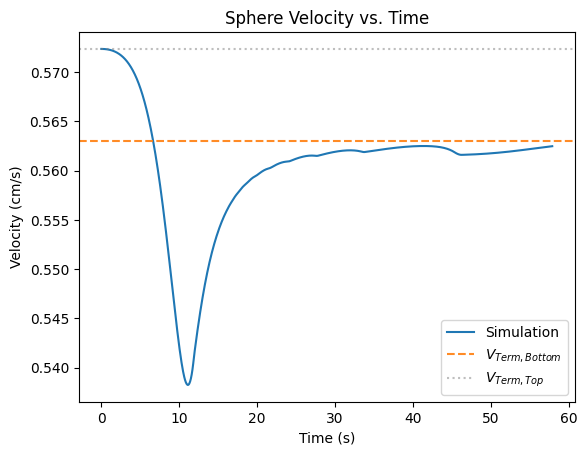

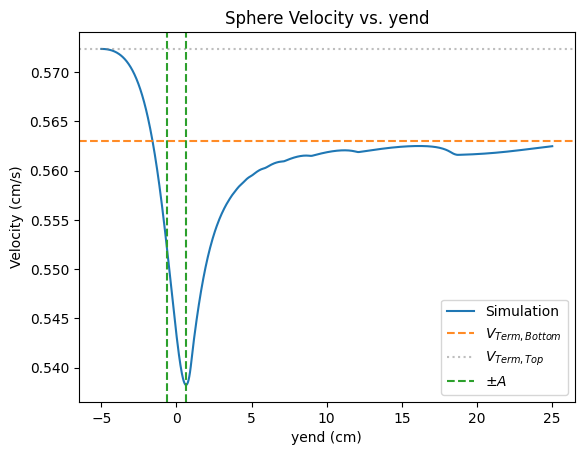

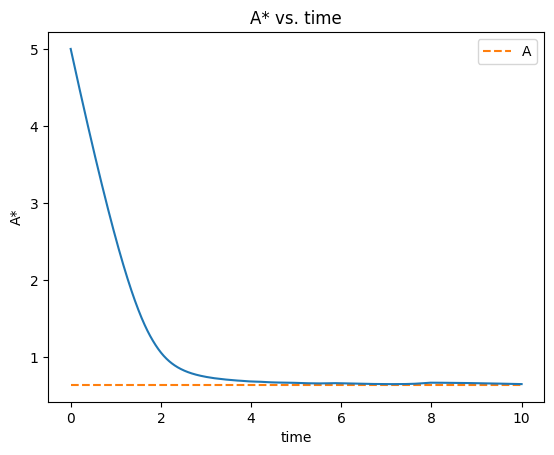

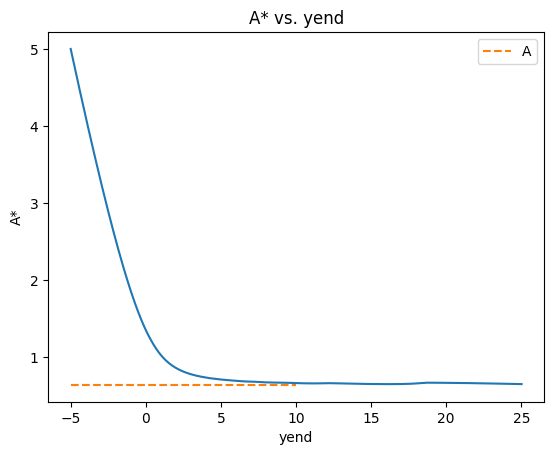

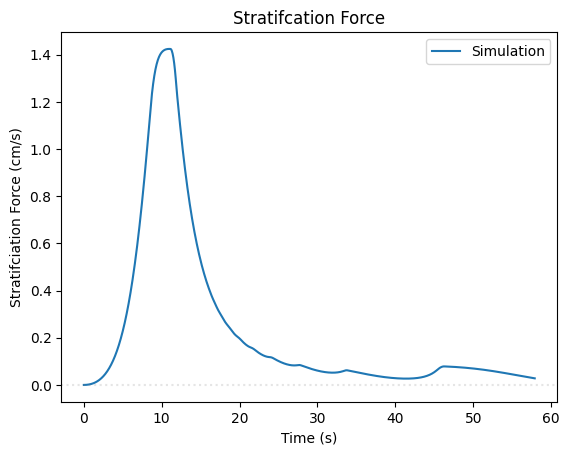

In [ ]:
main()

end of script
